# "East meets West": An Exploration of the Cultural Conflicts in Mother-and-daughter Relationship Based on the Text of _the Joy Luck Club_

## Yijia Wu


In [1]:
# Import all your libraries here, and only here, please.

from nltk import word_tokenize, sent_tokenize, ngrams, pos_tag
from nltk.text import Text
import pandas as pd
import numpy as np
from collections import Counter
from more_itertools import chunked
from nltk.corpus import brown
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
%matplotlib inline
import matplotlib.pyplot as plt

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

/Users/sigrid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sigrid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sigrid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sigrid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sigrid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sigrid/anaconda3/lib/python3.6/si

# 0. Introduction

One of the most influential feminist and essayist in the 20th century, Adrienne Rich, once described the mother-daughter relationship as "the deepest mutuality and the most painful estrangement"(226). Indeed, although mothers are the closest people to their daughters, they are also the biggest "enemy" in the daughters' adolescence. Such ambivalence is even intensified by the cultural collision in immigrants families. Amy Tan's novel The Joy Luck Club, a great Chinese American literature work, perfectly illustrates the Chinese American self-definition difficulties through the portrayal of the complicated mother-daughter relationship. In this paper, I will use computational analysis to explore how Amy Tan highlights the theme in the novel and discuss how to analyze the subtext behind the narratives.

In [2]:
#load the Joy Luck Club
club = open('the_joy_luck_club.md').read()

# 1. General Exploration

## 1.1 Theme/Motif Searching: Distinctive Words in _the Joy Luck Club_

To ensure the topic is worthy of discussing, I decided firstly to search for the most distinctive words to extract the core theme of the novel.

In [3]:
#remove the punctuations of texts to avoid distraction
def removePunct(text):
    punctuations = '''!()-[]{};:'",,,''<>./?@#$%^&*_~’'''
    no_Punct = ''
    for item in text:
        if item not in punctuations:
            no_Punct = no_Punct + item
    return no_Punct

In [4]:
clubnopunctTokens = word_tokenize(removePunct(club).lower())

In [5]:
#load the fiction words in brown corpus to compare with other novels
ficWords = brown.words(categories=['fiction'])
ficWordsL = [word.lower() for word in ficWords]

In [6]:
#make counts of tokens
clubCounts = Counter(clubnopunctTokens)
ficCounts = Counter(ficWords)

In [7]:
#make a dataframe of these counts
df = pd.DataFrame([clubCounts, ficCounts], 
                  index=['club', 'fic']).T.fillna(0)

In [8]:
#add frequencies
df['clubF'] = df['club']/len(clubnopunctTokens)
df['ficF'] = df['fic']/len(ficWordsL)

In [9]:
#define clubiness
df['clubiness'] = df['clubF']- df['ficF']

In [10]:
#sort the most distinctive words, focus on the top ones
df.sort_values('clubiness', ascending=False)[:6]

,club,fic,clubF,ficF,clubiness
i,3339.0,0.0,0.035243,0.000000,0.035243
my,1959.0,119.0,0.020677,0.001738,0.018939
she,1441.0,280.0,0.015210,0.004088,0.011121
and,3061.0,1696.0,0.032308,0.024763,0.007545
mother,654.0,9.0,0.006903,0.000131,0.006771
me,809.0,137.0,0.008539,0.002000,0.006539


In the list of the top six distictive words are all words related to "mother" or "I". Thus I concludes the core theme in _The Joy Luck Club_ is the mother-and-daughter relationship.

## 1.2 Narrow Down: A Stylometry Comparison Between Narratives of Mothers and Daughters

To have a general idea of what the relationship is like, I use PCA to make a stylometry comparison of all the sixteen stories in this book.

In [11]:
#split it into several parts according to different stories(narratives) in this novel
clubParts = club.split('%%%%%')

_The Joy Luck Club_ has a unique structure. It is divided into four parts with four narratives and one introduction in each part. So here the whole book is split into sixteen stories and four introductions as below.

In [12]:
#name these parts
#about the name:
#'a/b/c/d' refers to different chapters
#'intro' refers to the introduction part of a chapter
#'name(jingmei/anmei/...)' refers to the narrator of the story
#'D/M' refers to whether the narrator is daughter or mother
#'1/2/3/4' refers to the time that this narrator appears

a_intro = clubParts[1]
a_jingmeiD_1 = clubParts[2]
a_anmeiM_1 = clubParts[3]
a_lindoM_1 = clubParts[4]
a_yingyingM_1 = clubParts[5]

b_intro = clubParts[6]
b_waverlyD_1 = clubParts[7]
b_lenaD_1 = clubParts[8]
b_roseD_1 = clubParts[9]
b_jingmeiD_2 = clubParts[10]

c_intro = clubParts[11]
c_lenaD_2 = clubParts[12]
c_waverlyD_2 = clubParts[13]
c_roseD_2 = clubParts[14]
c_jingmeiD_3 = clubParts[15]

d_intro = clubParts[16]
d_anmeiM_2 = clubParts[17]
d_yingyingM_2 = clubParts[18]
d_lindoM_2 = clubParts[19]
d_jingmeiD_4 = clubParts[20]

In [13]:
allParts = [a_intro, a_jingmeiD_1, a_anmeiM_1, a_lindoM_1, a_yingyingM_1, 
            b_intro, b_waverlyD_1, b_lenaD_1, b_roseD_1, b_jingmeiD_2, 
            c_intro, c_lenaD_2, c_waverlyD_2, c_roseD_2, c_jingmeiD_3, 
            d_intro, d_anmeiM_2, d_yingyingM_2, d_lindoM_2, d_jingmeiD_4]

In [14]:
#make labels
allPartsLabels = ['a_intro', 'a_jingmeiD_1', 'a_anmeiM_1', 'a_lindoM_1', 'a_yingyingM_1', 
                  'b_intro', 'b_waverlyD_1', 'b_lenaD_1', 'b_roseD_1', 'b_jingmeiD_2', 
                  'c_intro', 'c_lenaD_2', 'c_waverlyD_2', 'c_roseD_2', 'c_jingmeiD_3', 
                  'd_intro', 'd_anmeiM_2', 'd_yingyingM_2', 'd_lindoM_2', 'd_jingmeiD_4']

In [15]:
mothersList = [a_anmeiM_1, a_lindoM_1, a_yingyingM_1, d_anmeiM_2, d_yingyingM_2, d_lindoM_2]
daughtersList = [a_jingmeiD_1, b_waverlyD_1, b_lenaD_1, b_roseD_1, b_jingmeiD_2, c_lenaD_2, 
             c_waverlyD_2, c_roseD_2, c_jingmeiD_3, d_jingmeiD_4]

In [16]:
mothers = ''.join(mothersList)
daughters = ''.join(daughtersList)

In [17]:
# initialize the vectorizer
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [18]:
#calculate the term frequencies of each word, and make the resulting matrix dense
#after several experiments, these are the most suitable parametres to set
tfidf = TfidfVectorizer(use_idf=True, 
                        stop_words='english', min_df=2, max_df=.5)

In [19]:
tfTable = tfidf.fit_transform(allParts).todense()

In [20]:
#reduce the dimensions to 2 using PCA
pca= PCA(n_components=2)

In [21]:
pcaOut = pca.fit_transform(tfTable)

/Users/sigrid/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/sigrid/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


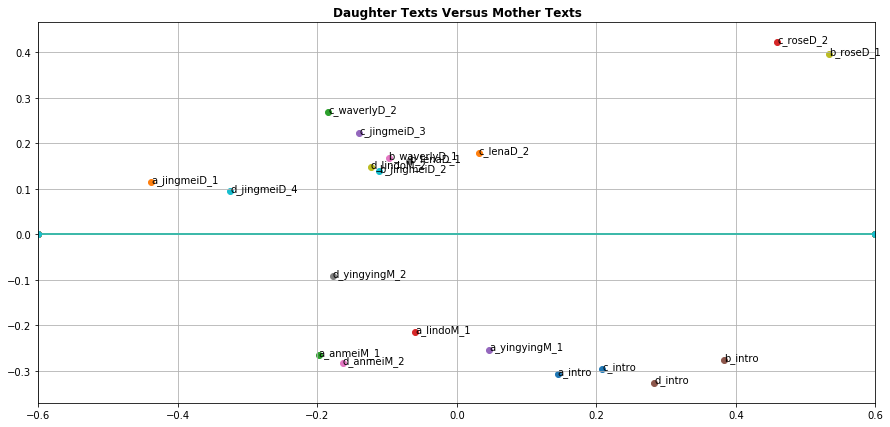

In [22]:
plt.rcParams['figure.figsize'] = [15, 7]
#plot the results
xs, ys = pcaOut[:,0],pcaOut[:,1]
x1, y1 = [-0.6,0.6], [0,0]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(allPartsLabels[i], (xs[i],ys[i]))
    plt.xlim(-0.6,0.6)
    plt.plot(x1, y1, marker = 'o')
ax = plt.subplot(111)
ax.grid('on')
ax.set_title('Daughter Texts Versus Mother Texts')
ttl = ax.title
ttl.set_weight('bold')

There are remarkable differences between mothers and daughters text. So my hypothesis lays as below.

## Hypothesis 1: Conflict is the dominant tone of the mother-daughter relationship in _the Joy Luck Club_.

# 2. Test for Hypothesis 1

In [23]:
#word tokenize the text of the novel, mothers' narratives and daughtes'
cTokens = word_tokenize(removePunct(club))
mTokens = word_tokenize(removePunct(mothers))
dTokens = word_tokenize(removePunct(daughters))

In [24]:
#POS tag the tokens
cPOS = pos_tag(cTokens)
mPOS = pos_tag(mTokens)
dPOS = pos_tag(dTokens)

In [25]:
cpos = [pair[1] for pair in cPOS]

In [26]:
Counter(cpos).most_common(6)

[('NN', 12925),
 ('IN', 9641),
 ('PRP', 9368),
 ('DT', 8037),
 ('VBD', 7751),
 ('JJ', 6141)]

The list shows us the POSs that Amy Tan frequently uses in her writings. The nouns and adjectives are the ones that convey the actual meanings most. In this case, I will use POS to find the most common JJ and NN, and try to explain how the results would prove my hypothesis.

## 2.1 POS - the Most Common Adjectives

In [27]:
#find the most common adjectives
def getA(taggedText): 
    a = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'JJ': 
            a.append(word)
    return a
clubA = getA(cPOS)
Counter(clubA).most_common(30)

[('other', 150),
 ('Chinese', 147),
 ('same', 140),
 ('little', 138),
 ('old', 121),
 ('many', 116),
 ('good', 113),
 ('first', 92),
 ('new', 91),
 ('own', 81),
 ('next', 81),
 ('bad', 72),
 ('much', 71),
 ('long', 68),
 ('small', 68),
 ('white', 65),
 ('big', 63),
 ('black', 63),
 ('large', 57),
 ('true', 55),
 ('last', 54),
 ('red', 51),
 ('American', 50),
 ('right', 47),
 ('few', 45),
 ('different', 43),
 ('young', 43),
 ('terrible', 41),
 ('open', 41),
 ('dark', 40)]

What we know from the list:

a)The most common adjectives are all contrasting pairs (in other words, almost any of the words can find its opposite word in the list). These pairs include: other-own; little-many; Chinese-American; old-new/young; good-bad/terrible; first-last; much-few; small-big/large; black-white. The results prove the hypothesis.

b)Three color appears quite often: black, white, red. Since white people are the dominant race in the USA; red is the traditional color of China; black always refers to death. I guess that white symbolizes American culture; red stands for Chinese values; black refers to the pain in life.

c)"Other" is the most frequent adjective. I assume Tan intends to create a sense of alienation because "other" is used to describe one thing that is separated from another.

To prove the assumptions in b) and c), I'm going to use ngram to analyze how Tan uses 'other' and the color words 'red,' 'black,' ‘white.’

In [28]:
#define function to find the nouns that appear after the color words
def redN(taggedText):
    redNs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'red':
            if bigram[1][1] in ['NN', 'NNS', 'NNP', 'NNPS']:
                redNs.append(bigram[1][0])
    return redNs

def blackN(taggedText):
    blackNs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'black': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP', 'NNPS']:
                blackNs.append(bigram[1][0])
    return blackNs

def whiteN(taggedText):
    whiteNs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'white': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP', 'NNPS']:
                whiteNs.append(bigram[1][0])
    return whiteNs

In [29]:
whiteCount = Counter(whiteN(cPOS)).most_common
blackCount = Counter(blackN(cPOS)).most_common
redCount = Counter(redN(cPOS)).most_common
frequencies = pd.DataFrame([whiteCount,blackCount, redCount],
                          index = ['white thing', 'black thing', 'red thing'])
frequencies = frequencies.fillna(0)
frequencies 

,0
white thing,<bound method Counter.most_common of Counter({...
black thing,<bound method Counter.most_common of Counter({...
red thing,<bound method Counter.most_common of Counter({...


In Counter "white," "squares" and "knight" describes chess which is a typical Western game. "Chenille" and "Bible" also represents the West. In Counter "red," words like "jade," palanquin," satin" are from East Asia. In Counter "black," there are negative words "black side," "ash," "mole" which may emphasize the dark part of life. One can also see a combination of both West elements and Eastern elements here like "pawn" (chess), "Wurlitzer", "motorcar" versus "silk," "Wyah," "rickshaw." Therefore it shows the assumption in 2.1 b) is correct.

In [30]:
def otherX(taggedText):
    otherXs = []
    bigrams = ngrams(taggedText, 2)
    for bigram in bigrams: 
        if bigram[0][0] == 'other': 
            if bigram[1][1] in ['NN', 'NNS', 'NNP', 'NNPS']:
                otherXs.append(bigram[0][0] + ' ' + bigram[1][0])
    return otherXs

In [31]:
Counter(otherX(cPOS)).most_common(1)

[('other side', 15)]

In [32]:
#Create an empty list
otherSent=[]
#Define a function to put ngrams(4<n<8) that occurs at least twice into the list
def otherput(text):
    for sent in text:
        if 'other side' in sent:
            otherSent.append(sent)
    return otherSent

In [33]:
clubSents = sent_tokenize(club)

In [34]:
otherput(clubSents)

['I saw my mother on the other side of the room.',
 'On the other side of the moon I saw the silhouette of a man appear.',
 'I darted fast as a lizard behind the stage, to the other side of the moon.',
 'As I began to play, the boy disappeared, the color ran out of the room, and I saw only my white pieces and his black ones waiting on the other side.',
 'The worst is on the other side."',
 'Then she bolted down the stairs and I quickly gathered up my books and followed her, careful to walk on the other side of the street.',
 'She says she hopes this baby is very happy on the other side.',
 'And at night, I could feel the crashing loud fights on the other side of my bedroom wall, this girl being beaten to death.',
 'And the daughter said, "Now you must come back, to the other side.',
 'On the other side of the cove, the wall was more jagged, eaten away by the water.',
 'The sun had shifted and moved over the other side of the cove wall.',
 'It drifted out, toward the other side of the c

According to Edward Said, "the construction of identity... involves the construction of opposites and 'others' whose actuality is always subject to the continuous interpretation and reinterpretation of their differences from 'us'"(332). Here, we can see Amy Tan always uses "other side" to show that daughters treat their mothers as an "Other" in their reconstruction of identity, or to show their alienation from the outside world caused by their family relationship issue. It justifies the assumption in 2.1 c).

To conclude, the results of 2.1 proves conflicts is the leading tone and suggest us to focus on the cultural conflicts because:

the adjectives are contrasting pairs

b) color words have connections with cultural symbols

c) the function of the word "other" is to make comparisons and create a sense of alienation.

## 2.2 POS - the Most Common Nouns

In [35]:
#find the most common nouns
def getN(taggedText): 
    n = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'NN': 
            n.append(word)
    return n
clubN = getN(cPOS)
Counter(clubN).most_common(10)

[('mother', 644),
 ('time', 163),
 ('father', 163),
 ('way', 151),
 ('day', 137),
 ('house', 131),
 ('face', 118),
 ('family', 111),
 ('girl', 109),
 ('room', 104)]

The results of 2.2 further emphasize on culture: "Mother," "father," "girl," "family" are the main characters in the novel. "Time" and "day" are time settings. But how can "face" appear 123 times in the book? "Face," which is written as "面子" in Chinese, is a unique phenomenon in Chinese culture. "A face is a negotiated public image, mutually granted each other by participants in a communicative event"(Scollon 35). In one of the concordances of "face," there is such a description of "face" by Popo, a representative of traditional Chinese value, "When you lose your face, it is like dropping your necklace down a well. The only way you can get it falls in after it." From this sentence, we can see how important "face" is to the Chinese. However, as American believes that humans are independent self-oriented individuals, there will be cultural conflicts between characters.

Now we know cultural differences counts in the mother-daughter relationship in the Joy Luck Club. But how can cultural conflicts influence family relations? I come out with a further hypothesis as below:

## Hypothesis 2: People from various cultural backgrounds has different mindsets. Thus it affects family relations by the collision of different communication mode and the difficulties in value acceptance.


To find some illustrations of traumas in immigrants families caused by cultural differences to prove Hypothesis 2, I carry out Test Two. In this test, I will use frequencies to find the most distinctive words and punctuations of daughters compared to their mothers and see the concordance. I will also use ngram to figure out the pattern that Amy Tan uses when giving the vivid picture of the characters' worldview.

# 3. Test for Hypothesis 2

## 3.1 Finding Distinctive Words: An Analysis of the Mother/Daughter Mindset

In [36]:
#to fully evaluate the narratives, I decided include punctuations this time
cpuncTokens = word_tokenize(club)
mpuncTokens = word_tokenize(mothers)
dpuncTokens = word_tokenize(daughters)
cCounts = Counter(cpuncTokens)
mCounts = Counter(mpuncTokens)
dCounts = Counter(dpuncTokens)

In [37]:
#make a dataframe of the counts
df = pd.DataFrame([clubCounts, mCounts, dCounts], 
                  index=['club', 'mothers', 'daughters']).T.fillna(0)

In [38]:
#add frequencies
df['clubF'] = df['club']*100/len(cpuncTokens)
df['motherF'] = df['mothers']*100/len(mpuncTokens)
df['daughterF'] = df['daughters']*100/len(dpuncTokens)

In [39]:
#define diness, which means the distinctiveness of the daughters' words
df['diness'] = df['daughterF']- df['motherF']

In [40]:
#sort the most distinctive words
df.sort_values('diness', ascending=False)

,club,mothers,daughters,clubF,motherF,daughterF,diness
",",0.0,1950.0,3871.0,0.000000,4.741757,5.543383,0.801627
'',0.0,366.0,987.0,0.000000,0.889991,1.413412,0.523421
``,0.0,387.0,1008.0,0.000000,0.941056,1.443485,0.502429
n't,0.0,72.0,316.0,0.000000,0.175080,0.452521,0.277441
mother,654.0,202.0,516.0,0.581783,0.491197,0.738927,0.247729
he,571.0,107.0,301.0,0.507948,0.260189,0.431041,0.170852
we,453.0,84.0,260.0,0.402978,0.204260,0.372327,0.168067
?,0.0,122.0,314.0,0.000000,0.296664,0.449657,0.152993
Auntie,0.0,13.0,127.0,0.000000,0.031612,0.181868,0.150256
said,471.0,138.0,329.0,0.418991,0.335570,0.471137,0.135567


In [41]:
Text(dpuncTokens).concordance("n't")

Displaying 25 of 316 matches:
ook black sesame-seed soup . '' `` Do n't show off , '' I said . `` It 's not s
s . I can never remember things I did n't understand in the first place . My mo
 behind in China and hopes they could n't begin to express in their fragile Eng
hings so strange and beautiful you ca n't ever imagine them . `` But I did n't 
 n't ever imagine them . `` But I did n't come to Kweilin to see how beautiful 
 leftovers mixed together . If it had n't been for the Japanese , there would h
 looked down on someone else . It did n't matter that everybody shared the same
o hide like wild animals . But you ca n't stay in the dark for so long . Someth
ay , I heard screaming sounds . I did n't know if it was a peasant slitting the
ng in his way on the sidewalk . I did n't go to the window to find out . What u
o with our meager allowances ! We did n't notice that the dumplings were stuffe
. We ate sparingly , not as if we did n't have enough , but to protest how we c
rget past 

In [42]:
#Create an empty list
negSent=[]
#Define a function to put ngrams(4<n<8) that occurs at least twice into the list
def negput(text):
    for sent in text:
        if "n't"in sent:
            negSent.append(sent)
    return negSent
dSents = sent_tokenize(daughters)
negSent_Club = negput(dSents)
negSent_Club[:10]

['"Don\'t show off," I said.',
 "I can never remember things I didn't understand in the first place.",
 "My mother could sense that the women of these families also had unspeakable tragedies they had left behind in China and hopes they couldn't begin to express in their fragile English.",
 "These were things so strange and beautiful you can't ever imagine them.",
 '"But I didn\'t come to Kweilin to see how beautiful it was.',
 "If it hadn't been for the Japanese, there would have been plenty of reason for fighting to break out among these different people.",
 "It didn't matter that everybody shared the same sidewalk to spit on and suffered the same fast-moving diarrhea.",
 "But you can't stay in the dark for so long.",
 "I didn't know if it was a peasant slitting the throat of a runaway pig or an officer beating a half-dead peasant for lying in his way on the sidewalk.",
 "I didn't go to the window to find out."]

In 3.1, we can evaluate mothers' and daughters' narratives in the following aspects:

1)The frequent use of the quotation mark(") and "said" suggest daughters pay more attention to verbal communication instead of nonverbal. The cultural background causes such a difference in the communication mode. American culture encourages more on the direct and precise expression, yet in China, people like to attach more importance to nonverbal communication like actions and silence.

2)"N't" and question mark(?) shows the uncertainty of daughters. Born in immigrants families, the daughters are troubled with identity issues and other related questions. They do not fully accept the Chinese social rules, at the same time, the white society excludes them. So in their inner world, they might have a negative and doubtful attitude to the outer world.

Although mothers are not our focus in this section, there are still a few points worth notice:

1)Mothers also use "not" a lot 2)"face" matters more to mothers

How exactly does it feel to have such struggle? Does Amy Tan use a particular pattern or literary devices to reveal the inner world of the mothers and daughters? Here continues the test.

## 3.2 Ngram: Finding Patterns

In [43]:
#Create an empty list
results=[]
#Define a function to put ngrams(4<n<8) that occurs at least twice into the list
def clubput(Tokens):
    for n in range(4, 8):
        clubNgrams = list(ngrams(Tokens, n))
        clubNgramCounter = Counter(clubNgrams)
        for ngram in clubNgrams:
            if clubNgramCounter[ngram]>2:
                results.append(ngram)
            if clubNgramCounter[ngram]==2:    
                results.append(ngram)

In [44]:
clubput(clubnopunctTokens)

In [45]:
#list the most common ones
Counter(results).most_common(20)

[(('the', 'joy', 'luck', 'club'), 15),
 (('as', 'if', 'she', 'were'), 15),
 (('at', 'the', 'same', 'time'), 14),
 (('as', 'if', 'she', 'had'), 13),
 (('as', 'if', 'i', 'had'), 12),
 (('as', 'if', 'i', 'were'), 10),
 (('and', 'then', 'i', 'saw'), 10),
 (('i', 'could', 'see', 'the'), 10),
 (('it', 'was', 'as', 'if'), 10),
 (('my', 'mother', 'told', 'me'), 9),
 (('for', 'the', 'first', 'time'), 9),
 (('on', 'the', 'other', 'side'), 9),
 (('the', 'other', 'side', 'of'), 9),
 (('over', 'and', 'over', 'again'), 9),
 (('my', 'mother', 'used', 'to'), 8),
 (('on', 'top', 'of', 'the'), 8),
 (('my', 'mother', 'and', 'i'), 8),
 (('the', 'side', 'of', 'the'), 8),
 (('other', 'side', 'of', 'the'), 8),
 (('even', 'though', 'i', 'was'), 8)]

The result reveals the critical themes again of the novel.

a) "The joy luck club" which is the title of the novel, ranks the first in the list. This 4-gram is the name of a weekly gathering of main characters to play mah-jong, eat good food, and gossip. It symbolizes the connection between the main characters. Frequent mentioning it can remind readers of the women's friendship, which is censorious, unsteady, competitive, but always loyal.

b) There are many "as if" phrases in the list. "As if" always makes the subordinate clause which uses the subjunctive mood. We use such a mood to talk about an imaginary situation or a situation that may not be true, but that is likely or possible. In this case, "as if she were/had," "as if I were/had" implicate the theme misunderstanding, between two generations and the cultural differences between two countries.

c) "My mother told me," "my mother used to," "my mother and I" appear a lot in the novel. These ngram corresponds to the family love, which is one of the key themes in the book since the narrators are all talking about their mothers and daughters.

d) Ngrams "for the first time" and "over and over again," "the side of the" and "other side of the," "even though I was" present us some contradictions and conflicts. The Joy Luck Club talks about a Chinese-American world, where the daughters are too American for their mothers' tastes, and the mothers are too Chinese for their daughters'. Thus, many emotions or experience become "the first time" in their life. However, their fixed mindset cannot easily change even though after their mothers or daughters have tried to challenge it "over and over again." They are just like "the side" and "other side," contrasting but connected.

But back to our topic, Amy Tan's pattern is her craze for using "as if" sentences.

In [46]:
#Create an empty list
asifSent=[]
#Define a function to put ngrams(4<n<8) that occurs at least twice into the list
def asifput(text):
    for sent in text:
        if 'as if' in sent:
            asifSent.append(sent)
    return asifSent

In [47]:
clubSents = sent_tokenize(club)

In [48]:
asifSent_Club = asifput(clubSents)

In [49]:
len(asifSent_Club)

136

Here I make a list sorted by sentiments so that we can read the most sentimental ones in "as if" sentences.

In [50]:
asifSentiments = [TextBlob(sent).sentiment.polarity
                    for sent in asifSent_Club]

In [51]:
#make a dataframe of these counts
df = pd.DataFrame([asifSentiments, asifSent_Club], 
                  index=['Sentiment', 'Sent']).T.fillna(0)

In [52]:
pd.set_option('display.max_colwidth', -1)

In [53]:
df.sort_values(by=['Sentiment'])[0:5]

,Sentiment,Sent
18,-1.000000,My body was writhing as if I were seized by a terrible pain.
4,-0.600000,"The others look uncomfortable, as if this were not how they intended to break some sort of bad news to me."
8,-0.500000,"They still look troubled, as if something were out of balance."
132,-0.400000,"It seemed as if I wanted to sustain my grief, to assure myself that I had cared deeply enough."
70,-0.328571,"She would say stiff words to my father and brothers, as if I had become invisible and she was talking about a rotten fish she had thrown away but which had left behind its bad smell."


In [54]:
df.sort_values(by=['Sentiment'])[131:136]

,Sentiment,Sent
11,0.6,"Because I was promised to the Huangs' son for marriage, my own family began treating me as if I belonged to somebody else."
71,0.6,"But instead, she gathered her face into a frown and stared into my eyes, as if she could force some kind of truth out of me."
112,0.7,"""Your mother,"" said Yan Chang, as if talking to herself, ""is too good for this family."""
24,0.7,"But I stayed, as if caught in a good dream."
96,0.7,She said it in a way as if this were proof—proof of something good.


Some of these sentences are direct, and some are ironic. But the computer doesn't know much about irony. So the sentiments evaluation results are not that accurate. The most sentimental "as if" sentences embody the inner world of the characters. In the close reading of these sentences, there are expressions like "as if I had become invisible" and "as if she could force some kind of truth out of me," we can see daughters think their mothers communicate with them in a wrong way or even refuse to communicate at all. "As if" create a space that is illusory but also real, where Chinese mothers and their American daughters exist together. In such a space, Tan uses action, psychology, and other descriptions to make the conflicts between the characters more specific.

The results of 3 prove Hypothesis 2 is correct.

# 4. Conclusion

Using computational analysis in distant and close reading to Amy Tan's novel The Joy Luck Club, we can have a glimpse on the mother-daughter relationship in immigrants family. According to Tan's writing, cultural differences are the main reason for conflicts of the narrators. She uses color words, contrasting adjectives, and specific cultural elements to convey such a theme. Cultural differences have a significant influence on people's mindset. In immigrants families, people are especially suffering from different values, and various communication modes, caused by cultural collision，they also have serious trouble with self-cognition. Amy Tan likes explicitly using "as if" sentences to give vivid pictures of the characters. Some of these sentences are simple and direct, others are ironic and need us to understand the subtext.

# Works Cited

Lewis, Trinidad, et al. "Intercultural Communication: A Discourse Approach." TESOL Quarterly, vol. 30, no. 2, 1996.

Rich, Adrienne. Of Woman Born: Motherhood As Experience and Institution. Virago, 1997.

Said, E. W. Orientalism. Random House US, 2014.